# 🚀 머신러닝 실습 : 고객 구매 데이터로 성별 예측 모델링 (분류 문제)

* 주어진 데이터는 백화점 고객의 1년 간 구매 데이터입니다.
* 고객 3,500명에 대한 학습용 데이터(y.csv, X.csv)를 이용하여 성별예측 모형을 만들어보세요.
* 모델의 성능은 자유롭게 측정해봅니다!

## [실습 프로세스]
1. 데이터 불러오기  
2. 데이터 탐색
3. 데이터 전처리  
4. 학습/테스트 데이터 분리  
5. 모델 선택 및 학습  
6. 예측 및 평가  


<br/>

---

<br/>
<br/>

# 0. 라이브러리 불러오기

* 라이브러리를 가져와서 과정을 준비합니다

In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

<br/>

---

<br/>
<br/>

# 1. 데이터 불러오기
* 데이터를 가져와서 과정을 준비합시다.
- 인코딩 방식은 'euc-kr' 을 활용하세요.
- 데이터 출처 : 한국데이터산업진흥원 빅데이터분석기사 실기 공개 예시 문항

- 독립 변수 데이터셋 : ./data/X.csv
- 종속 변수 데이터셋 : ./data/y.csv


데이터 파일을 불러옵니다. 보통 CSV 파일을 pandas로 읽어옵니다.

In [237]:
import os
# 노트북 파일이 있는 폴더로 이동 (예시)
os.chdir(r'C:\githome\hipython_rep')

# 변경 후 확인
print("변경 후:", os.getcwd())

변경 후: c:\githome\hipython_rep


In [238]:
X = pd.read_csv('./data1/X.csv', encoding='euc-kr')
y = pd.read_csv('./data1/y.csv', encoding='euc-kr')

<br/>

---

<br/>
<br/>

# 2. 데이터 탐색하기
* 데이터를 이해할 수 있도록 탐색과정을 수행해봅시다.


데이터의 상위 몇 개 행을 출력하여 전체 구조를 미리 확인합니다.

In [239]:
X.head()

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1
2,2,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1
3,3,16077620,4935000,NaN,기타,광주점,18,2.444444,0.318182,16
4,4,29050000,24000000,NaN,보석,본 점,2,1.500000,0.000000,85


In [ ]:
y.head()

,cust_id,gender
0,0,0
1,1,0
2,2,1
3,3,1
4,4,0



데이터의 요약 정보나 통계 정보를 출력해 변수들의 유형과 분포를 확인합니다.

In [241]:
X.info()
# y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cust_id  3500 non-null   int64  
 1   총구매액     3500 non-null   int64  
 2   최대구매액    3500 non-null   int64  
 3   환불금액     1205 non-null   float64
 4   주구매상품    3500 non-null   object 
 5   주구매지점    3500 non-null   object 
 6   내점일수     3500 non-null   int64  
 7   내점당구매건수  3500 non-null   float64
 8   주말방문비율   3500 non-null   float64
 9   구매주기     3500 non-null   int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 273.6+ KB


In [242]:
y['gender'].value_counts() 
# 성별 0인 사람 2184명
# 성별 1인 사람 1316명

gender
0    2184
1    1316
Name: count, dtype: int64

In [243]:
X.describe()

,cust_id,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기
count,3500.000000,3.500000e+03,3.500000e+03,1.205000e+03,3500.000000,3500.000000,3500.000000,3500.000000
mean,1749.500000,9.191925e+07,1.966424e+07,2.407822e+07,19.253714,2.834963,0.307246,20.958286
std,1010.507298,1.635065e+08,3.199235e+07,4.746453e+07,27.174942,1.912368,0.289752,24.748682
min,0.000000,-5.242152e+07,-2.992000e+06,5.600000e+03,1.000000,1.000000,0.000000,0.000000
25%,874.750000,4.747050e+06,2.875000e+06,2.259000e+06,2.000000,1.666667,0.027291,4.000000
50%,1749.500000,2.822270e+07,9.837000e+06,7.392000e+06,8.000000,2.333333,0.256410,13.000000
75%,2624.250000,1.065079e+08,2.296250e+07,2.412000e+07,25.000000,3.375000,0.448980,28.000000
max,3499.000000,2.323180e+09,7.066290e+08,5.637530e+08,285.000000,22.083333,1.000000,166.000000


<br/>

---

<br/>
<br/>

# 3. 데이터 전처리
* 전처리 과정을 통해서 머신러닝에 사용할 수 있는 형태의 데이터 준비


필요한 라이브러리를 불러옵니다.
- 인코딩 : LabelEncoder
- 데이터 표준화 : StandardScaler

In [244]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

* 단순히 1부터의 숫자를 부여한 'cust_id'를 수치형 변수로 받아들이면, 결과가 왜곡될 수 있으니 컬럼을 제거합니다.

In [245]:
X = X.drop(columns=['cust_id'])
y = y['gender']

- 데이터에 결측치가 있는지 확인해보세요


In [246]:
X.isnull().sum() # 환불금액 null

총구매액          0
최대구매액         0
환불금액       2295
주구매상품         0
주구매지점         0
내점일수          0
내점당구매건수       0
주말방문비율        0
구매주기          0
dtype: int64

- 결측치에 0으로 채워 넣어 모델 학습에 지장이 없도록 합니다.

In [247]:
X['환불금액'] = X['환불금액'].fillna(0)
X.isnull().sum()

총구매액       0
최대구매액      0
환불금액       0
주구매상품      0
주구매지점      0
내점일수       0
내점당구매건수    0
주말방문비율     0
구매주기       0
dtype: int64


문자형 범주 데이터를 숫자로 바꾸기 위한 인코딩을 수행합니다.

In [248]:
# LabelEncoder 객체 생성
le_prod = LabelEncoder()
le_store = LabelEncoder()

# 인코딩 적용
X['주구매상품'] = le_prod.fit_transform(X['주구매상품'])
X['주구매지점'] = le_store.fit_transform(X['주구매지점'])

각 데이터에 표준화를 적용하여 데이터의 스케일(크기 차이)을 맞춰줍니다.
- 평균을 0, 표준편차를 1로 맞춰서 → 데이터가 정규 분포 형태로 변환되도록 하세요

In [249]:
scaler = StandardScaler()
X_scaled =  pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled

,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,-0.144580,-0.262608,-0.047505,-0.738357,-1.904703,-0.009338,0.554247,0.758623,-0.159962
1,-0.549190,-0.547967,-0.265461,0.490702,1.466677,-0.635003,-0.698168,-1.060530,-0.806554
2,-0.542700,-0.563504,-0.275429,-0.661541,-1.727262,-0.635003,-0.436675,-1.060530,-0.806554
3,-0.463911,-0.460465,-0.275429,-0.738357,-1.549821,-0.046142,-0.204236,0.037746,-0.200374
4,-0.384561,0.135544,-0.275429,0.029805,-0.485175,-0.635003,-0.698168,-1.060530,2.588052
...,...,...,...,...,...,...,...,...,...
3495,-0.542833,-0.519615,-0.275429,-0.891990,-0.485175,-0.671807,-0.436675,2.391196,-0.846966
3496,-0.381022,-0.389656,-0.074430,0.567518,-0.307733,-0.414180,-0.632794,0.532574,0.769513
3497,-0.561796,-0.612398,-0.275429,1.335680,1.821559,-0.671807,-0.959661,-1.060530,-0.846966
3498,-0.550786,-0.583480,-0.275429,2.027026,-0.485175,-0.635003,-0.959661,-1.060530,0.729101


In [250]:
X.head()

,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,68282840,11264000,6860000.0,5,0,19,3.894737,0.527027,17
1,2136000,2136000,300000.0,21,19,2,1.500000,0.000000,1
2,3197000,1639000,0.0,6,1,2,2.000000,0.000000,1
3,16077620,4935000,0.0,5,2,18,2.444444,0.318182,16
4,29050000,24000000,0.0,15,8,2,1.500000,0.000000,85


In [251]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: gender, dtype: int64

In [252]:
# X와 y 합치기 (인덱스 기준 병합)
data = pd.concat([X, y], axis=1)

data.head()

,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,gender
0,68282840,11264000,6860000.0,5,0,19,3.894737,0.527027,17,0
1,2136000,2136000,300000.0,21,19,2,1.500000,0.000000,1,0
2,3197000,1639000,0.0,6,1,2,2.000000,0.000000,1,1
3,16077620,4935000,0.0,5,2,18,2.444444,0.318182,16,1
4,29050000,24000000,0.0,15,8,2,1.500000,0.000000,85,0


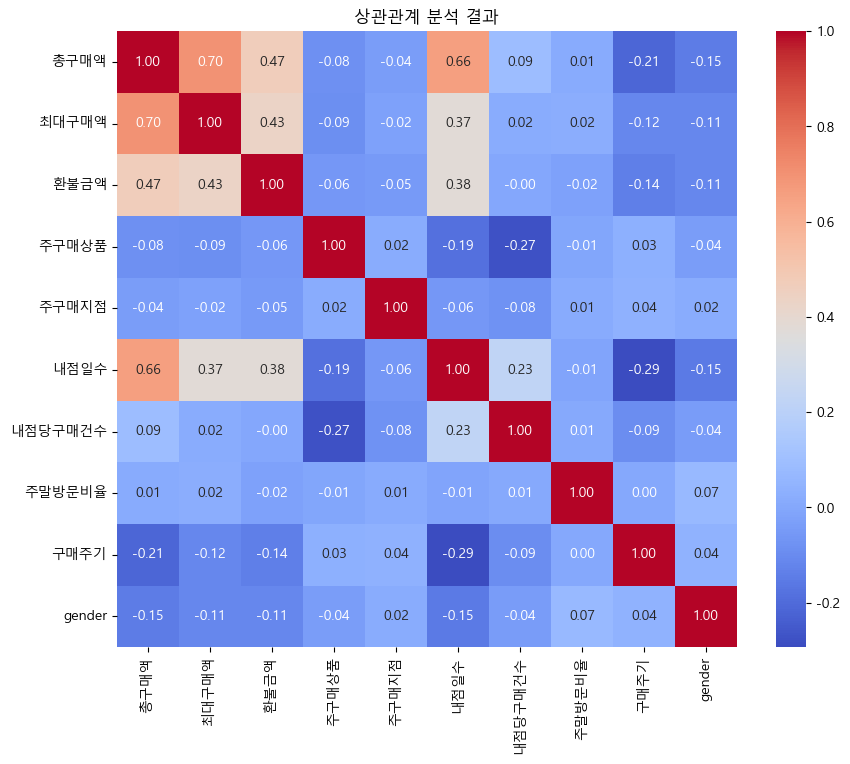

In [253]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 상관분석
cor = data.corr()

# 히트맵 출력
plt.figure(figsize=(10, 8))
sns.heatmap(cor, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('상관관계 분석 결과')
plt.show()

In [254]:
#selected_features = ['총구매액', '주구매지점', '환불금액', '주구매상품', '주말방문비율', '구매주기']
#X_selected = X[selected_features]

In [255]:
#X_selected.head()

In [256]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X_selected)

<br/>

---

<br/>
<br/>

# 5-1. 모델링 - LogisticRegression

* 본격적으로 모델을 선언하고 학습시킵니다.


필요한 라이브러리를 불러옵니다.

In [257]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

모델을 선언하여 객체화시킵니다.

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=11)

In [259]:
lr = LogisticRegression(random_state=42, max_iter=1000)


모델을 학습 데이터에 맞춰 학습시킵니다.

In [260]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

<br/>

---

<br/>
<br/>

# 6-1. 예측 성능 확인해보기 - LogisticRegression

- 학습된 모델로 테스트 데이터에 대한 예측을 수행합니다.

In [261]:
y_pred_lr = lr.predict(X_test)

- 학습시킨 모델의 성능을 알아봅니다
- 각 평가지표로 모델의 성능을 수치화하여 확인합니다.
- 필요한 라이브러리를 import 하고 성능을 확인해보세요 (정확도, 정밀도, 재현율, f1, confusion_matrix)

In [262]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Accuracy: 0.6242857142857143
Precision: 0.48214285714285715
Recall: 0.10344827586206896
F1 Score: 0.17034700315457413
Confusion Matrix:
 [[410  29]
 [234  27]]



<br/>

---

<br/>
<br/>

# 5-2. 모델링 - DecisionTreeClassifier

* 본격적으로 모델을 선언하고 학습시킵니다.


필요한 라이브러리를 불러옵니다.

In [263]:
from sklearn.tree import DecisionTreeClassifier

모델을 선언하여 객체화시킵니다.

In [264]:
dt = DecisionTreeClassifier(random_state=42)

모델을 학습 데이터에 맞춰 학습시킵니다.

In [265]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)



<br/>
<br/>

# 6-2. 예측 성능 확인해보기 - DecisionTreeClassifier

- 학습된 모델로 테스트 데이터에 대한 예측을 수행합니다.

In [266]:
y_pred_dt = dt.predict(X_test)

- 학습시킨 모델의 성능을 알아봅니다
- 각 평가지표로 모델의 성능을 수치화하여 확인합니다.
- 필요한 라이브러리를 import 하고 성능을 확인해보세요 (정확도, 정밀도, 재현율, f1, confusion_matrix)

In [267]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Accuracy: 0.5657142857142857
Precision: 0.41825095057034223
Recall: 0.421455938697318
F1 Score: 0.4198473282442748
Confusion Matrix:
 [[286 153]
 [151 110]]



<br/>

---

<br/>
<br/>

# 5-3. 모델링 - RandomForestClassifier

* 본격적으로 모델을 선언하고 학습시킵니다.



필요한 라이브러리를 불러옵니다.

In [268]:
from sklearn.ensemble import RandomForestClassifier

모델을 선언하여 객체화시킵니다.

In [269]:
rf = RandomForestClassifier(random_state=42, n_estimators=100)

모델을 학습 데이터에 맞춰 학습시킵니다.

In [270]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)



<br/>
<br/>

# 6-3. 예측 성능 확인해보기 - RandomForestClassifier

- 학습된 모델로 테스트 데이터에 대한 예측을 수행합니다.

In [271]:
y_pred_rf = rf.predict(X_test)

- 학습시킨 모델의 성능을 알아봅니다
- 각 평가지표로 모델의 성능을 수치화하여 확인합니다.
- 필요한 라이브러리를 import 하고 성능을 확인해보세요 (정확도, 정밀도, 재현율, f1, confusion_matrix)

In [272]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.6228571428571429
Precision: 0.49079754601226994
Recall: 0.3065134099616858
F1 Score: 0.37735849056603776
Confusion Matrix:
 [[356  83]
 [181  80]]



<br/>

---

<br/>
<br/>

# 5-4. 모델링 - XGBoost

* 본격적으로 모델을 선언하고 학습시킵니다.



필요한 라이브러리를 불러옵니다.

In [273]:
from xgboost import XGBClassifier

모델을 선언하여 객체화시킵니다.

In [274]:
xgb = XGBClassifier(
    n_estimators=100,       # 트리 개수
    learning_rate=0.1,      # 학습률
    max_depth=3,            # 트리 최대 깊이
    random_state=42         # 재현 가능성
)


모델을 학습 데이터에 맞춰 학습시킵니다.

In [275]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)



<br/>
<br/>

# 6-4. 예측 성능 확인해보기 - XGBoost

- 학습된 모델로 테스트 데이터에 대한 예측을 수행합니다.

In [276]:
y_pred_xgb = xgb.predict(X_test)

- 학습시킨 모델의 성능을 알아봅니다
- 각 평가지표로 모델의 성능을 수치화하여 확인합니다.
- 필요한 라이브러리를 import 하고 성능을 확인해보세요 (정확도, 정밀도, 재현율, f1, confusion_matrix)

In [277]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("정확도 (Accuracy):", accuracy_score(y_test, y_pred_xgb))
print("정밀도 (Precision):", precision_score(y_test, y_pred_xgb))
print("재현율 (Recall):", recall_score(y_test, y_pred_xgb))
print("F1 점수:", f1_score(y_test, y_pred_xgb))
print("혼동 행렬:\n", confusion_matrix(y_test, y_pred_xgb))

정확도 (Accuracy): 0.6628571428571428
정밀도 (Precision): 0.5886524822695035
재현율 (Recall): 0.31800766283524906
F1 점수: 0.4129353233830846
혼동 행렬:
 [[381  58]
 [178  83]]


<br/>

---


<br/>

## 7.  위 4가지 모델의 학습 & 예측 & 평가 결과를 확인하고 최고 성능을 내는 모델을 찾아봅시다!

- 어떤 모델이 가장 성능이 좋은가요 ?

In [278]:
print("LogisticRegression - 정확도 (Accuracy):", accuracy_score(y_test, y_pred_lr))
print("DecisionTreeClassifier - 정확도 (Accuracy):", accuracy_score(y_test, y_pred_dt))
print("RandomForestClassifier - 정확도 (Accuracy):", accuracy_score(y_test, y_pred_rf))
print("XGBoost - 정확도 (Accuracy):", accuracy_score(y_test, y_pred_xgb))


LogisticRegression - 정확도 (Accuracy): 0.6242857142857143
DecisionTreeClassifier - 정확도 (Accuracy): 0.5657142857142857
RandomForestClassifier - 정확도 (Accuracy): 0.6228571428571429
XGBoost - 정확도 (Accuracy): 0.6628571428571428


| 모델명                    | 정확도 (Accuracy) | 정밀도 (Precision) | 재현율 (Recall) | F1 Score  |
| ---------------------- | -------------- | --------------- | ------------ | --------- |
| **LogisticRegression** | 62.4%          | 48.2%           | 10.3%        | 17.0%     |
| **DecisionTree**       | 56.6%          | 41.8%           | **42.1%**    | **41.9%** |
| **RandomForest**       | 62.3%          | 49.1%           | 30.7%        | 37.7%     |
| **XGBoost**            | **66.3%**      | **58.9%**       | 31.8%        | 41.3%     |


- XGBoost가 가장 뛰어난 모델이다.
- 정확도와 정밀도에서 우수한 성능을 보인다.
- 재현율과 F1 score에서도 안정적인 성능을 보인다.